# 1. Arithmetic Operations

Image arithmetic is the implementation of standard arithmetic operations, such as addition, subtraction, multiplication, and division, on images. Image arithmetic has many uses in image processing both as a preliminary step in more complex operations and by itself. Image arithmetic is applied to create functions that can adjust brightness contrast apply alpha betha blending and transparency,and create instagram like filters.
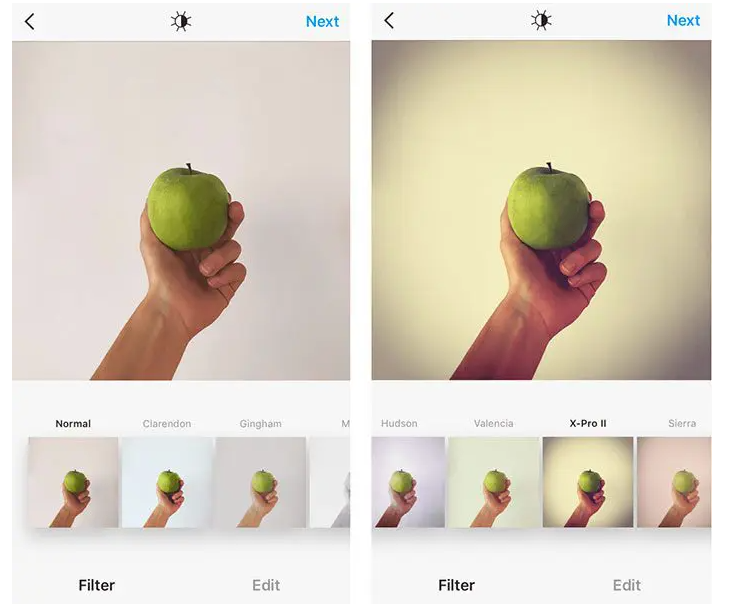

In [43]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def show(image=None,title=''):
        size = 8
        w,h = image.shape[0],image.shape[1]
        aspect_ratio = w/h # a proportional relationship between an image's width and height.
        plt.figure(figsize=(size*aspect_ratio,size))
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        plt.title("Image")
        plt.show

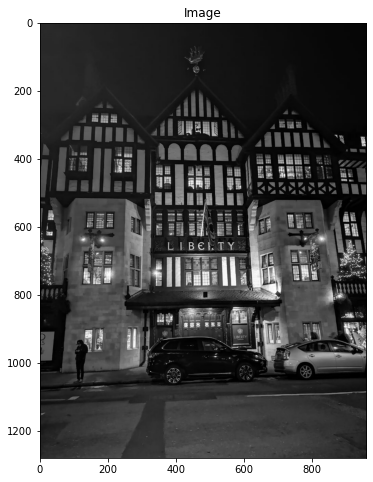

In [44]:
image = cv2.imread('images/liberty.jpeg',0) # 0 for making the image grayscaled
show(image)

To adjust the brightness of an image, we change the value of all pixels by a constant. Adding a positive constant to all of the image pixel values makes the image brighter.

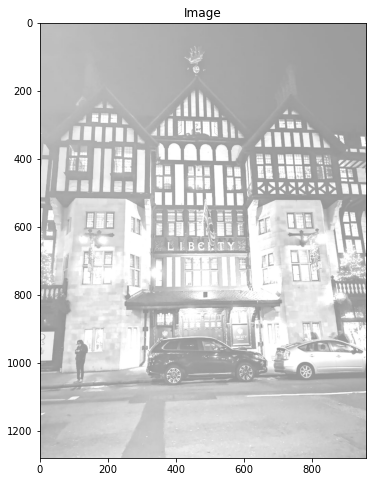

In [45]:
ones = np.ones(image.shape, dtype="uint8") *150 #Creating a matrix of 1's and multiplying it with 100
new_img = cv2.add(image,ones)
show(new_img,"Increased Brightness")

We can subtract a positive constant from all of the pixel values to make the image darker.

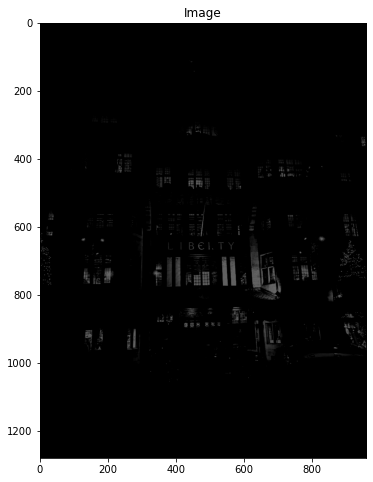

In [46]:
subtracted_img = cv2.subtract(image,ones)
show(subtracted_img,"Decreased Brightness")

# 2. Thresholding, Binarization & Adaptive Thresholding

Different Thresholding Methods

More information : https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


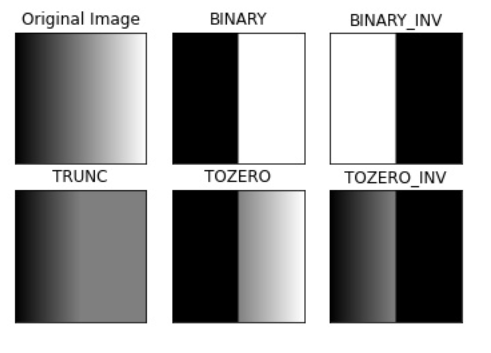

In simple thresholding, the threshold value is global, i.e., it is same for all the pixels in the image.

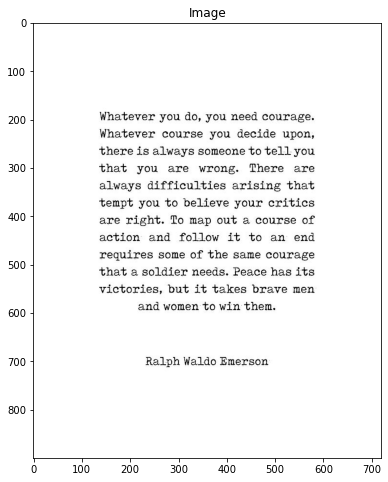

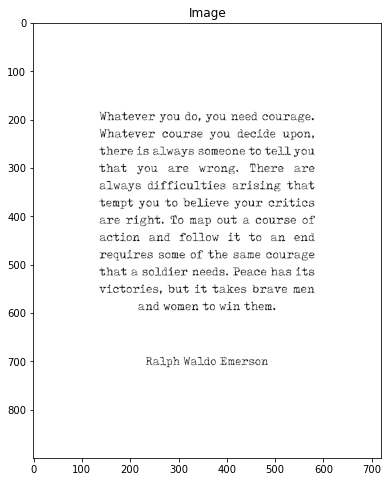

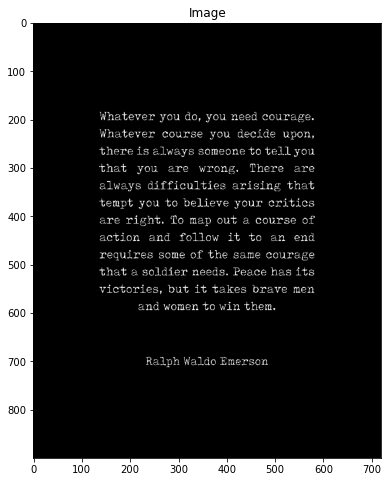

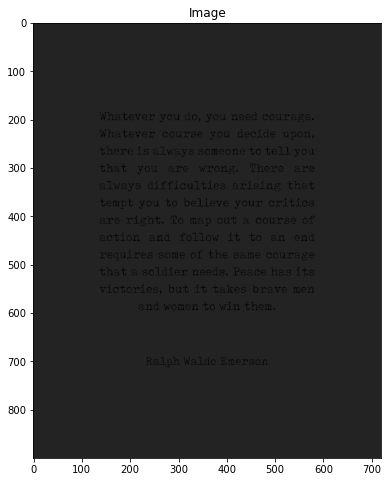

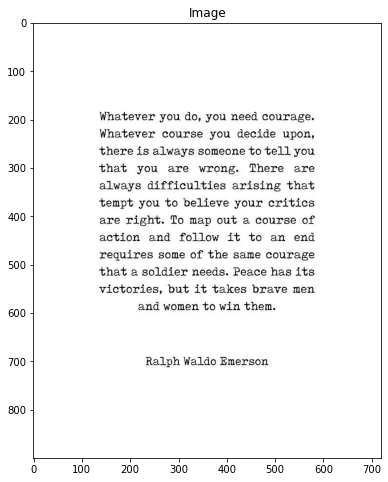

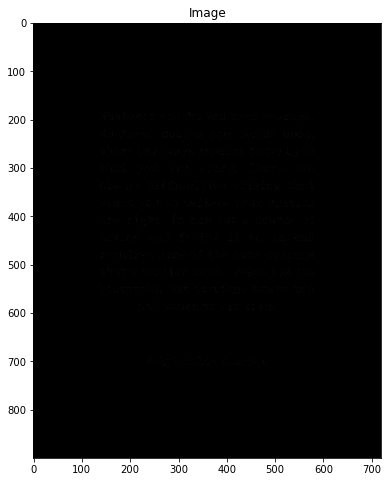

In [47]:
image = cv2.imread('images/book.jpg',0) #grayscale image
show(image,"Original image")

ret,thresh1 = cv2.threshold(image, 35, 255, cv2.THRESH_BINARY) # Values below 35 gets 0(black) above 35, gets 255(white)
show(thresh1,'Threshold1')

ret,thresh2 = cv2.threshold(image, 35, 255, cv2.THRESH_BINARY_INV)
show(thresh2, 'Threshold2') #Reverse of above



ret,thresh3 = cv2.threshold(image, 35, 255, cv2.THRESH_TRUNC) #Values above 35 are held, at 35
show(thresh3,'Threshold3')


ret,thresh4 = cv2.threshold(image, 35, 255, cv2.THRESH_TOZERO) #Values below 35 goes to black, above 35 left unchanged
show(thresh4,'Threshold4')

ret,thresh5 = cv2.threshold(image, 35, 255, cv2.THRESH_TOZERO_INV) #reverse of code above
show(thresh5,'Threshold5')

Adaptive thresholding is the method where the threshold value is calculated for smaller regions and therefore, there will be different threshold values for different regions.

https://www.tutorialspoint.com/opencv/opencv_adaptive_threshold.htm#:~:text=Adaptive%20thresholding%20is%20the%20method,()%20of%20the%20Imgproc%20class.

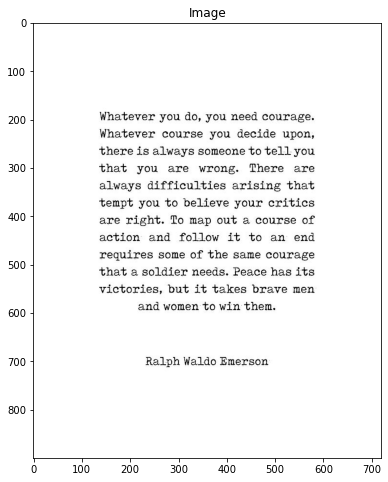

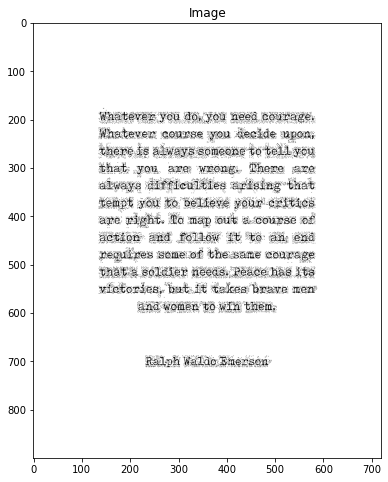

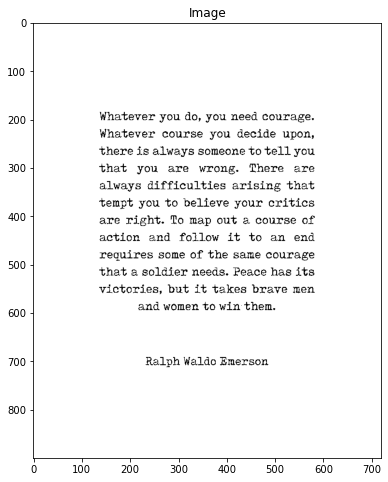

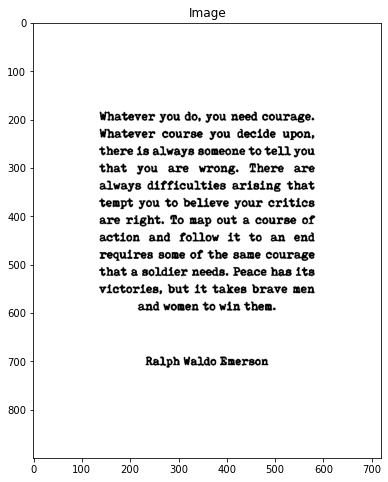

In [48]:
image = cv2.imread('images/book.jpg',0) #grayscale image
show(image,"Original image")


thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
show(thresh,'Adaptive Thresholding') 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(th2, 'Otsu Thresholding') 


#Blurring an image can remove noise:

blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show( th3,"Guassian Blurring Otsu's Thresholding") 

# 3. Morphological Operations and Edge Detection

Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.

https://it.mathworks.com/help/images/morphological-dilation-and-erosion.html#:~:text=Dilation%20adds%20pixels%20to%20the,used%20to%20process%20the%20image.




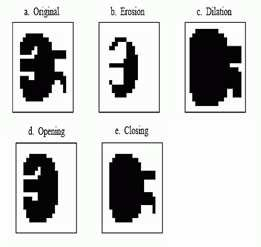



Detailed decribtion of morphological operators : https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

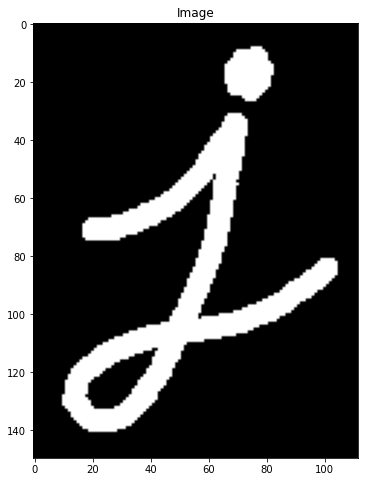

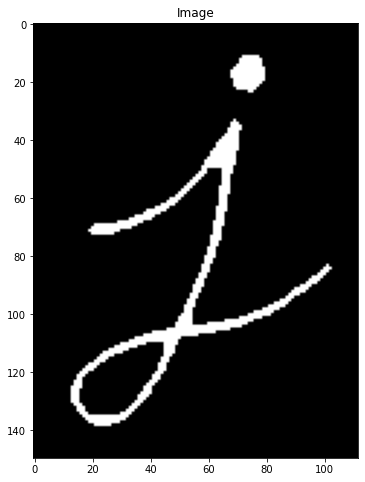

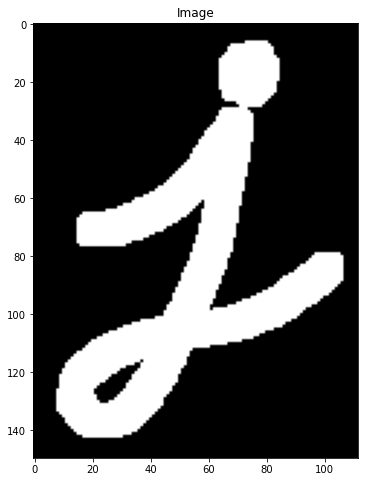

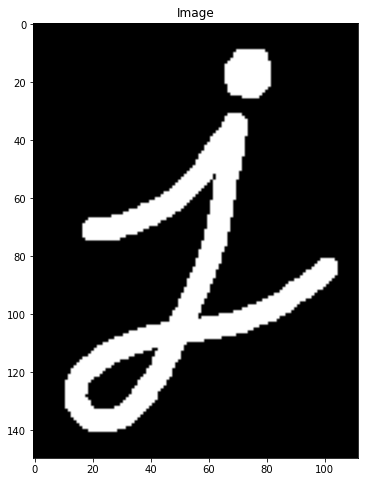

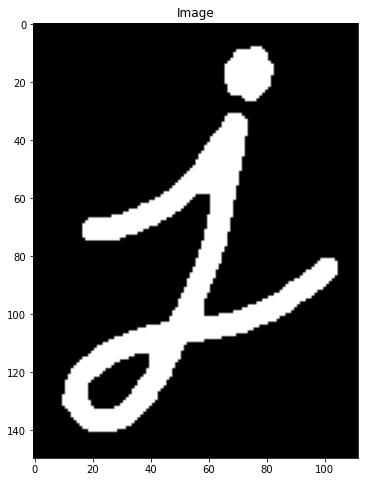

In [56]:
image = cv2.imread('images/j.png',0)
show(image)
kernel = np.ones((5,5),np.uint8)  #defining the kernel size

erosion = cv2.erode(image,kernel,iterations = 1)
show(erosion,"Eroded")

dilation = cv2.dilate(image,kernel,iterations = 1)

show(dilation,"Dilated")

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
show(opening,"Opening Applied")

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
show(closing,"Closing Applied")

Edge detection is an image-processing technique, which is used to identify the boundaries (edges) of objects, or regions within an image. Edges are among the most important features associated with images. 

- Canny Edge Detection https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

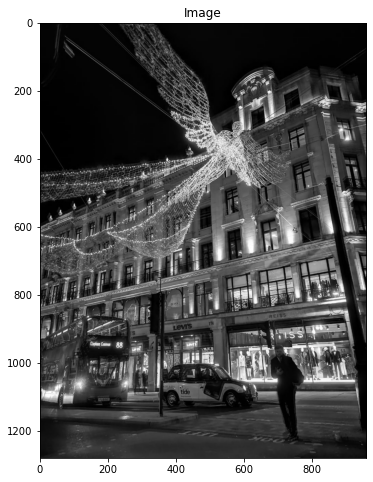

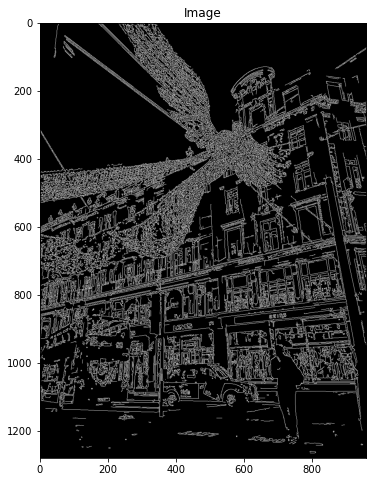

In [60]:
image = cv2.imread('images/londonxmas.jpeg',0)
# Canny Edge Detection uses gradient values as thresholds
edges = cv2.Canny(image,100,200)
show(image,"Original")
show(edges,"Canny")



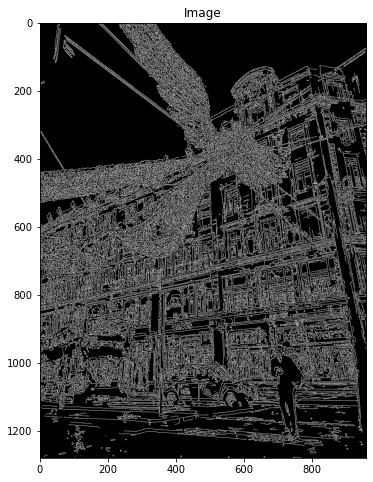

In [63]:
def optimalCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  median_value = np.median(image) 
  lower = int(max(0, 0.66 * median_value))
  upper = int(min(255, 1.33 * median_value))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

optimal_canny = optimalCanny(image)
show( optimal_canny)